本代码适用于针对 WISE 2MASS vega星等数据计算流量（flux），并画出SED。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# WISE vega星等转流量

def flux_wise_w1(mag_vega):
    mag_ab = mag_vega + 2.699
    F = 10**(-(mag_ab+48.60)/2.5) * 10**23
    return F

def flux_wise_w2(mag_vega):
    mag_ab = mag_vega + 3.339
    F = 10**(-(mag_ab+48.60)/2.5) * 10**23
    return F

def flux_wise_w3(mag_vega):
    mag_ab = mag_vega + 5.174
    F = 10**(-(mag_ab+48.60)/2.5) * 10**23
    return F

def flux_wise_w4(mag_vega):
    mag_ab = mag_vega + 6.620
    F = 10**(-(mag_ab+48.60)/2.5) * 10**23
    return F

In [3]:
# 2MASS vega星等转流量

def flux_2mass_J(mag_vega):
    mag_ab = mag_vega + 0.91
    F = 10**(-(mag_ab+48.60)/2.5) * 10**23
    return F

def flux_2mass_H(mag_vega):
    mag_ab = mag_vega + 1.39
    F = 10**(-(mag_ab+48.60)/2.5) * 10**23
    return F

def flux_2mass_K(mag_vega):
    mag_ab = mag_vega + 1.85
    F = 10**(-(mag_ab+48.60)/2.5) * 10**23
    return F

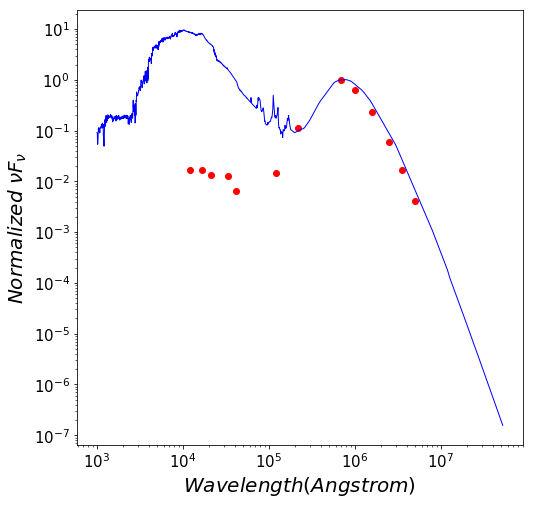

In [6]:
# 挑一个点多的画图
# 导入数据：HERSCHEL flux 单位：mJy；WISE 2MASS vega星等
data = pd.read_csv("flux_original.csv")

# 计算流量
c = 3 * 10**14  # um/s
wavelength_um = [70, 100, 160, 250, 350, 500, 3.4, 4.2, 12, 22, 1.23, 1.66, 2.15]
nu = [c/i for i in wavelength_um]
wavelength = [i*10000 for i in wavelength_um]
flux = [data['herf_70'][97]/1000, data['herf_100'][97]/1000, data['herf_160'][97]/1000, 
        data['herf_250'][97]/1000, data['herf_350'][97]/1000, data['herf_500'][97]/1000, 
        flux_wise_w1(data['wisevega_1'][97]), flux_wise_w2(data['wisevega_2'][97]), 
        flux_wise_w3(data['wisevega_3'][97]), flux_wise_w4(data['wisevega_4'][97]), 
        flux_2mass_J(data['2mvega_j'][97]), flux_2mass_H(data['2mvega_h'][97]), 
        flux_2mass_K(data['2mvega_k'][97])]
nuF = np.multiply(np.array(nu), np.array(flux))
norm_nuF = [i/nuF[0] for i in nuF]

# 导入模板（S0）
temp_S0 = pd.read_csv("S0_template_norm.sed", sep='\s+', header=None, names=['wavelength0','Flambda0'])
wavelength0 = temp_S0['wavelength0']
Flambda0 = temp_S0['Flambda0']
lambdaF0 = np.multiply(np.array(wavelength0), np.array(Flambda0))  # lambda F_lambda = nu F_nu
a = 0
for i in range(len(temp_S0)):
    if wavelength0[i] == 700000:
        a = i
norm_lambdaF0 = [i/lambdaF0[a] for i in lambdaF0]

# 绘图
plt.figure(figsize=(8,8))
plt.loglog()
plt.scatter(wavelength, norm_nuF, color="r", linewidth=1)
plt.plot(wavelength0, norm_lambdaF0, color="b", linewidth=1)
plt.xlabel(r"$Wavelength(Angstrom)$",fontsize=20)
plt.ylabel(r"$ Normalized \ \nu F_{\nu} $",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()

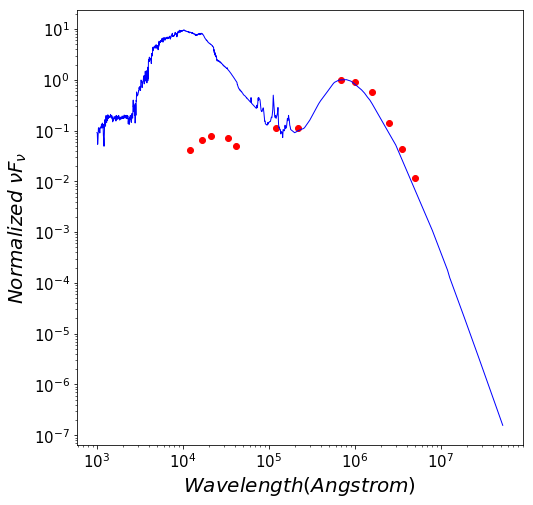

In [7]:
# 再来一个
# 导入数据
data = pd.read_csv("flux_original.csv")

# 计算流量
c = 3 * 10**14  # um/s
wavelength_um = [70, 100, 160, 250, 350, 500, 3.4, 4.2, 12, 22, 1.23, 1.66, 2.15]
nu = [c/i for i in wavelength_um]
wavelength = [i*10000 for i in wavelength_um]
flux = [data['herf_70'][370]/1000, data['herf_100'][370]/1000, data['herf_160'][370]/1000, 
        data['herf_250'][370]/1000, data['herf_350'][370]/1000, data['herf_500'][370]/1000, 
        flux_wise_w1(data['wisevega_1'][370]), flux_wise_w2(data['wisevega_2'][370]), 
        flux_wise_w3(data['wisevega_3'][370]), flux_wise_w4(data['wisevega_4'][370]), 
        flux_2mass_J(data['2mvega_j'][370]), flux_2mass_H(data['2mvega_h'][370]), 
        flux_2mass_K(data['2mvega_k'][370])]
nuF = np.multiply(np.array(nu), np.array(flux))
norm_nuF = [i/nuF[0] for i in nuF]

# 导入模板（S0）
temp_S0 = pd.read_csv("S0_template_norm.sed", sep='\s+', header=None, names=['wavelength0','Flambda0'])
wavelength0 = temp_S0['wavelength0']
Flambda0 = temp_S0['Flambda0']
lambdaF0 = np.multiply(np.array(wavelength0), np.array(Flambda0))  # lambda F_lambda = nu F_nu
a = 0
for i in range(len(temp_S0)):
    if wavelength0[i] == 700000:
        a = i
norm_lambdaF0 = [i/lambdaF0[a] for i in lambdaF0]

# 绘图
plt.figure(figsize=(8,8))
plt.loglog()
plt.scatter(wavelength, norm_nuF, color="r", linewidth=1)
plt.plot(wavelength0, norm_lambdaF0, color="b", linewidth=1)
plt.xlabel(r"$Wavelength(Angstrom)$",fontsize=20)
plt.ylabel(r"$ Normalized \ \nu F_{\nu} $",fontsize=20)
plt.tick_params(labelsize=15)
plt.show()